# [Loan Prediction](https://www.kaggle.com/datasets/ninzaami/loan-predication)

Author: [1chooo](https://1chooo.com)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataFrame = pd.read_csv("./data/loan_prediction_training_data.csv")

In [3]:
dataFrame.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataFrame.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataFrame["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [8]:
dataFrame["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [9]:
dataFrame["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [10]:
dataFrame["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<Axes: >

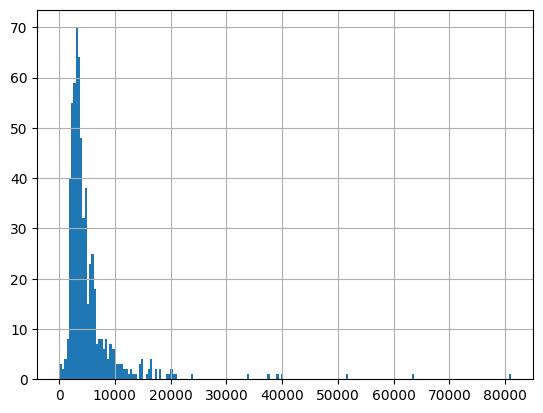

In [11]:
dataFrame["ApplicantIncome"].hist(bins = 200)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

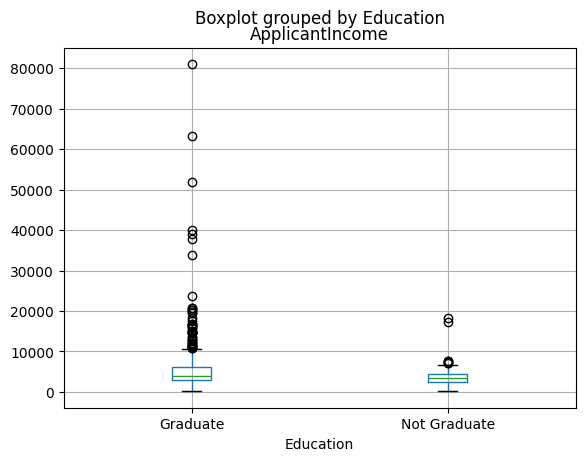

In [12]:
dataFrame.boxplot(column = "ApplicantIncome", by = "Education")

<Axes: >

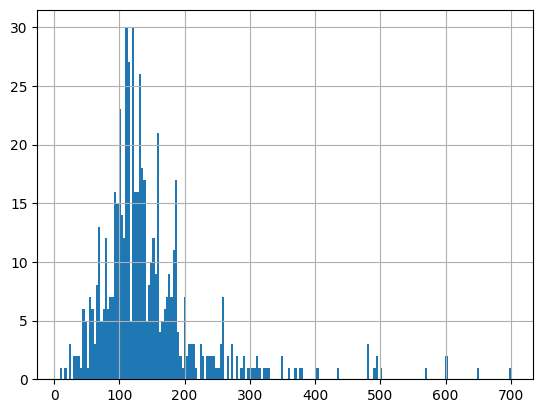

In [13]:
dataFrame["LoanAmount"].hist(bins = 200)

<Axes: title={'center': 'LoanAmount'}, xlabel='Self_Employed'>

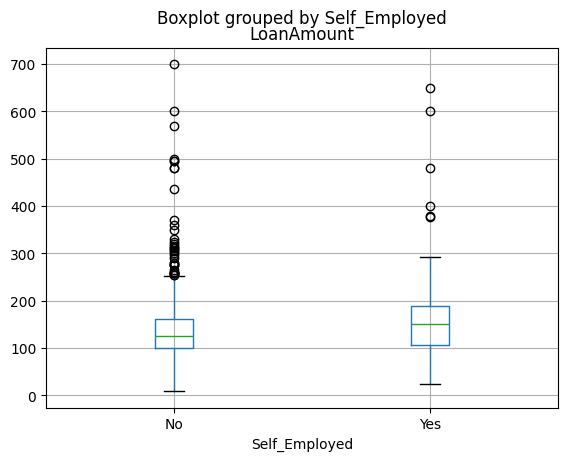

In [14]:
dataFrame.boxplot(column = "LoanAmount", by = "Self_Employed")

In [15]:
temp1 = dataFrame["Credit_History"].value_counts(ascending = True)
temp2 = dataFrame.pivot_table(
    values = "Loan_Status", 
    index = ["Credit_History"], 
    aggfunc = lambda x: x.map({'Y': 1, 'N': 0}).mean()
)

We can try other data type to observe.

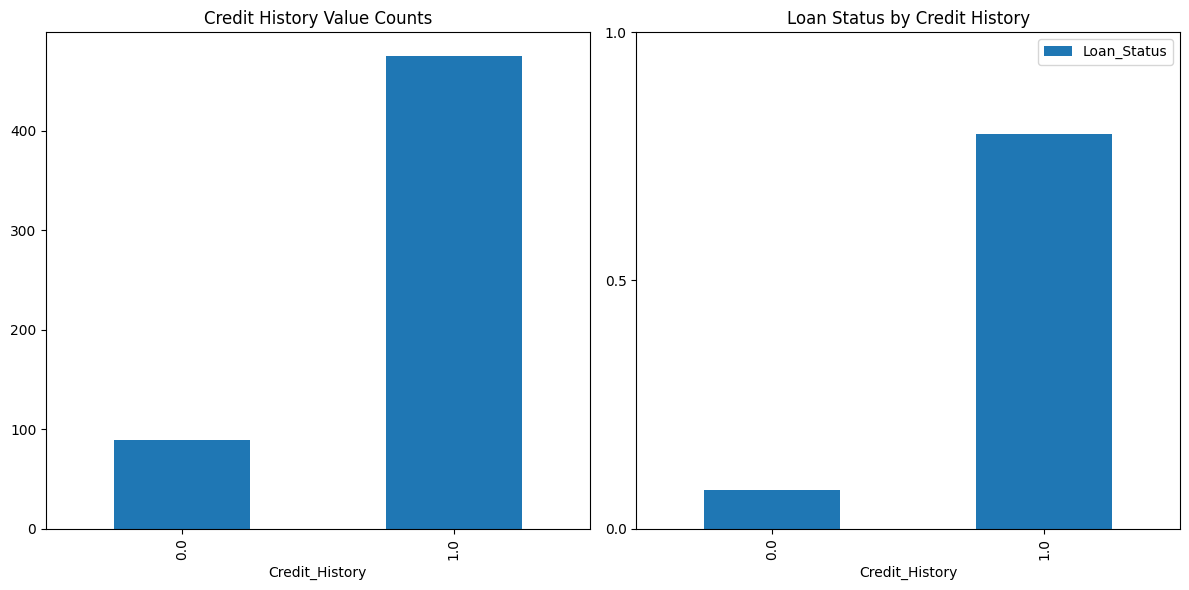

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

temp1.plot(kind="bar", ax=axes[0], title="Credit History Value Counts")
temp2.plot(kind="bar", yticks=[0, 0.5, 1], ax=axes[1], title="Loan Status by Credit History")

plt.tight_layout()
plt.show()

<Axes: xlabel='Credit_History'>

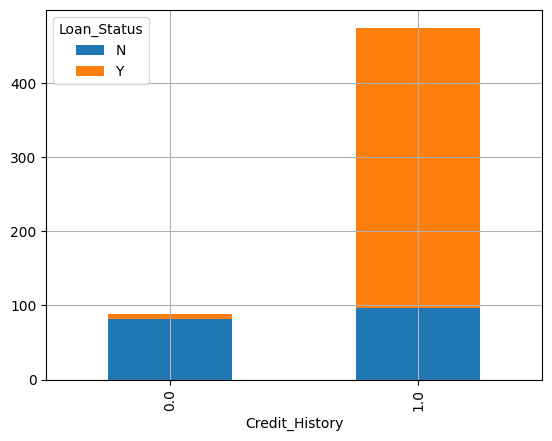

In [17]:
temp5 = pd.crosstab(dataFrame["Credit_History"], dataFrame["Loan_Status"])
temp5.plot(kind = "bar", stacked = True, grid = True)

We can also cross more than one datatype.

<Axes: xlabel='Credit_History,Gender'>

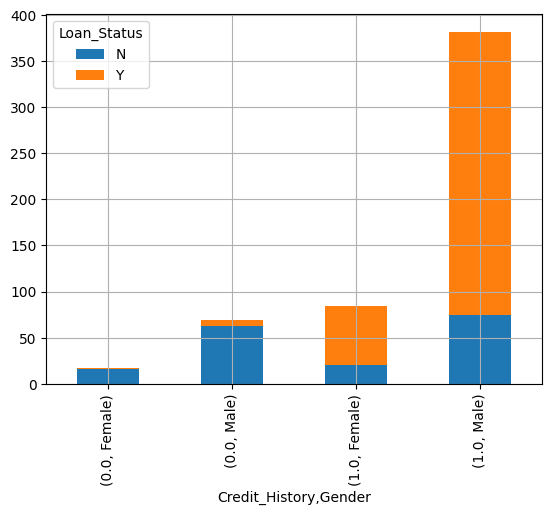

In [18]:
temp5 = pd.crosstab(
    [dataFrame["Credit_History"], dataFrame["Gender"]], 
	dataFrame["Loan_Status"]
)
temp5.plot(
    kind = "bar", 
    stacked = True, 
    grid = True
)

Solve the missing value.

- The method we choose to fill the missing value 
- is through showing the most frequently data.

In [19]:
dataFrame.isnull().sum().sort_values(ascending=False)
dataFrame.apply(lambda x:sum(x.isnull()), axis=0).sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
dataFrame["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [21]:
print(500 / (500 + 82))

0.8591065292096219


In [22]:
dataFrame["Self_Employed"].fillna("No", inplace = True)

/var/folders/r6/7l4wrzxn2b1536z06d9p994m0000gn/T/ipykernel_33619/1276584971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame["Self_Employed"].fillna("No", inplace = True)


The other way to fill the missing values.

- Be careful to check the index we use is not lacking.

In [23]:
table = dataFrame.pivot_table(
    values="LoanAmount", 
    index="Self_Employed", 
    columns="Education", 
    aggfunc=np.median
)

/var/folders/r6/7l4wrzxn2b1536z06d9p994m0000gn/T/ipykernel_33619/4143876156.py:1: FutureWarning: The provided callable <function median at 0x1119f1bc0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  table = dataFrame.pivot_table(


Manually

In [24]:
table.loc["Yes", "Graduate"]
table.loc["No", "Not Graduate"]

113.0

Automatically

In [25]:
def fage(x):
    return table.loc[x["Self_Employed"], x["Education"]]

In [26]:
dataFrame["LoanAmount"].fillna(
    dataFrame.apply(fage, axis=1), 
    inplace = True
)

/var/folders/r6/7l4wrzxn2b1536z06d9p994m0000gn/T/ipykernel_33619/1751838627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame["LoanAmount"].fillna(


<Axes: >

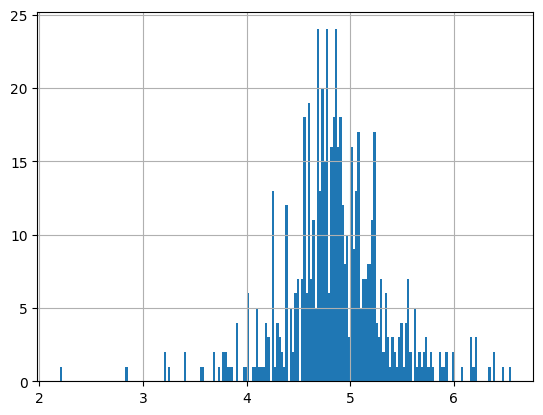

In [27]:
dataFrame["LoanAmount_log"] = np.log(dataFrame["LoanAmount"])
dataFrame["LoanAmount_log"].hist(bins = 200)

<Axes: >

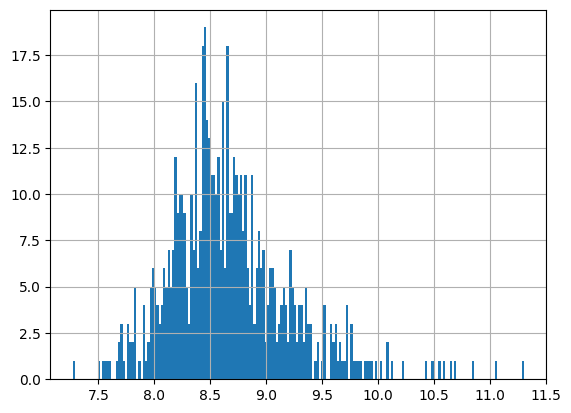

In [28]:
dataFrame["TotalIncome"] = dataFrame["ApplicantIncome"] + dataFrame["CoapplicantIncome"]
dataFrame["TotalIncome_log"] = np.log(dataFrame["TotalIncome"])
dataFrame["TotalIncome_log"].hist(bins = 200)

In [29]:
dataFrame["Gender"].value_counts()
dataFrame["Gender"].mode()[0]

'Male'

we use the most frequency value to fill the missing value.


In [30]:
dataFrame["Gender"].fillna(dataFrame["Gender"].mode()[0], inplace = True)
dataFrame["Married"].fillna(dataFrame["Married"].mode()[0], inplace = True)
dataFrame["Dependents"].fillna(dataFrame["Dependents"].mode()[0], inplace = True)
dataFrame["Loan_Amount_Term"].fillna(dataFrame["Loan_Amount_Term"].mode()[0], inplace = True)
dataFrame["Credit_History"].fillna(dataFrame["Credit_History"].mode()[0], inplace = True)

/var/folders/r6/7l4wrzxn2b1536z06d9p994m0000gn/T/ipykernel_33619/3034936974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame["Gender"].fillna(dataFrame["Gender"].mode()[0], inplace = True)
/var/folders/r6/7l4wrzxn2b1536z06d9p994m0000gn/T/ipykernel_33619/3034936974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [31]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

If Dtype equals object we need to diverse into numerical number.

Convert types from object to numerical number.

Then we pick up something that is related to diverse.


In [32]:
var_mod = [
    "Gender", 
    "Married", 
    "Dependents", 
    "Education", 
    "Self_Employed",
    "Property_Area",
	"Loan_Status"
]

Before we continue we can check the most frequency types of value.


In [33]:
dataFrame["Gender"].value_counts()
dataFrame["Married"].value_counts()
dataFrame["Dependents"].value_counts()
dataFrame["Education"].value_counts()
dataFrame["Self_Employed"].value_counts()
dataFrame["Property_Area"].value_counts()
dataFrame["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [35]:
for i in var_mod:
    dataFrame[i] = labelEncoder.fit_transform(dataFrame[i])

Send the model to let machine learn.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def LoanModel(
        model, 
        data, 
        predictors, 
        outcome, 
        testSize, 
        randomStateNumber
    ) -> None:
    
    x = data[predictors]
    y = data[outcome]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testSize, random_state = randomStateNumber)
    model.fit(x_train, y_train)     # this line we have done the module
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    print(f"Accuracy:{accuracy}")
    print(f"Recall:{recall}")
    print(f"Precision:{precision}")
    

A series of little experiment to chwck how accurate of the module.

The first experiment

In [37]:
outcome_var = "Loan_Status"
model = LogisticRegression()
predictor_var = ["Credit_History"]
LoanModel(model, dataFrame, predictor_var, outcome_var, 0.3, 6)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision:0.79375


The second experiment, we want to check whether the different module wil make the different outcome it's because that our data is too small.

In [38]:
outcome_var = "Loan_Status"
model2 = DecisionTreeClassifier()
predictor_var = ["Credit_History"]
LoanModel(model2, dataFrame, predictor_var, outcome_var, 0.3, 6)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision:0.79375


The third experiment, we add more variable to check

In [39]:
outcome_var = "Loan_Status"
model3 = LogisticRegression()
predictor_var = ["Credit_History", "Gender", "Married", "Education"]
LoanModel(model3, dataFrame, predictor_var, outcome_var, 0.3, 6)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision:0.79375


The forth experiment, we also use the different module to check the outcome.

In [40]:
outcome_var = "Loan_Status"
model3 = RandomForestClassifier(n_estimators=10)     # we can change more trees in this module
predictor_var = ["Credit_History", "Gender", "Married", "Education"]
LoanModel(model3, dataFrame, predictor_var, outcome_var, 0.3, 6)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision:0.79375


The fifth experiment, we add more variable; however we didn't find more accurate

In [41]:
outcome_var = 'Loan_Status'
model4 = RandomForestClassifier(n_estimators=10)
predictor_var = [
    'Credit_History',
    'Gender',
    'Married',
    'Education',
    'Dependents',
    'Self_Employed', 
    'Property_Area',
    'LoanAmount_log',
    'TotalIncome_log'
]
LoanModel(model4, dataFrame, predictor_var, outcome_var, 0.3, 6)

Accuracy:0.7621621621621621
Recall:0.8359375
Precision:0.823076923076923


The sixth experiment, we conbine the first and the fifth experiment


In [42]:
outcome_var = 'Loan_Status'
model5 = LogisticRegression()
predictor_var = [
    'Credit_History',
    'Gender',
    'Married',
    'Education',
    'Dependents',
    'Self_Employed', 
    'Property_Area',
    'LoanAmount_log',
    'TotalIncome_log'
]

LoanModel(
    model5, 
    dataFrame, 
    predictor_var, 
    outcome_var, 
    0.3, 
    6
)

Accuracy:0.8162162162162162
Recall:0.9921875
Precision:0.79375


We will pick the last version of wxperiment to suit the user interface, then we will do it the next. 

We have a lot of data, but we only pick up one of them. This allow lots of data to be tested.

In [43]:
model5.predict([[1, 1, 1, 1, 1, 1, 1, np.log(150), np.log(5000)]])

/Users/hugolin/Developer/ai/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

Export the module

In [44]:
import joblib

joblib.dump(
    model5, 
    "loan-or-not-logistic-regression-20240928.pkl", 
    compress=3
)

['loan-or-not-logistic-regression-20240928.pkl']